Загрузка и подготовка данных

In [161]:
import pandas as pd

In [162]:
from collections import Counter

In [163]:
def split_dataset(dataset_path, split_lines, column_indices):

  df = pd.read_excel(dataset_path)

  df = df.iloc[:, column_indices]

  # Split the dataset
  df1 = df.iloc[:split_lines[0]].to_csv("train_dataset.csv", index=False)
  df_test = df.iloc[split_lines[0]:].to_csv("test_dataset.csv", index=False)

  return df1, df_test

In [164]:
dataset_path = "project_2_dataset.xlsx"
split_lines = [215]
column_indices = [0, 1, 2, 3, 4, 13, 14]
df1, df_test = split_dataset(dataset_path, split_lines, column_indices)

In [165]:
print("Датасет")
df1 = pd.read_csv("train_dataset.csv")
df1['Степень интеграции'] = df1['Степень интеграции'].replace({
    2.0: 'Partly fixed',
    4.0: 'Mixed',
    6.0: 'Mixed',
    8.0: 'Forced switch',
    10.0: 'True switch'
})
df1.head()

Датасет


,Класс,Русская графика,Английская графика,Произношение,Степень интеграции,Контекст,Словарь
0,слово,смайл,smile,русское обычное,Partly fixed,Теперь в цветовую пальтру добавили фиолетовый ...,Русский орфографический словарь; Современный с...
1,термин англ,эвридэй лоу прайс,everyday low price,английское с влиянием русского,Forced switch,а вот зелёные самые интересные рядом с ними бу...,отсутствует
2,термин англ,хай лоу прайс,high low price,английское с влиянием русского,Forced switch,весь остальной магазин работает по стандартно...,отсутствует
3,слово,прайс,price,русское обычное,Partly fixed,весь остальной магазин работает по стандартно...,Русской орфографический словарь; Русское слове...
4,слово,фастфуд,fast food,русское обычное,Partly fixed,магнит объявил что тестирует продажу фастфуда ...,Русский орфографический словарь


In [166]:
df_test = pd.read_csv("test_dataset.csv")
df_test.head()

,Класс,Русская графика,Английская графика,Произношение,Степень интеграции,Контекст,Словарь
0,термин,эм би эй,MBA,русское обычное,NaN,с 2009 по 2011 год я получала MBA в гарвардско...,отсутствует
1,бренд,маккензи,McKinsey,смешанное,NaN,я работала в компании McKinsey была аналитиком...,отсутствует
2,слово,милитари,military,русское обычное,NaN,вообще считается что Гарвард - Это школа трёх ...,Русский орфографический словарь
3,слово,перформила,perform,русское обычное,NaN,ну как-то я хорошо перформила как очень умные ...,отсутствует
4,термин,саббатикал,sabbatical,русское обычное,NaN,очень выгодно отправлять людей либо в декрет л...,отсутствует


In [167]:
Counter(df1["Степень интеграции"])

Counter({'Partly fixed': 55,
         'Forced switch': 38,
         'Mixed': 85,
         'True switch': 37})

In [168]:
import re

In [169]:
def lowercase_russian(text):
  russian_pattern = r"\b[а-яА-ЯёЁ]+\b"
  lowercased_text = re.sub(russian_pattern, lambda match: match.group(0).lower(), text)
  return lowercased_text

In [170]:
df1["Контекст"] = df1["Контекст"].apply(lowercase_russian)

In [171]:
df_test["Контекст"] = df_test["Контекст"].apply(lowercase_russian)

In [172]:
from nltk.util import ngrams

In [173]:
def create_ngrams(text, n):
  tokens = text.split()
  ngrams_list = list(ngrams(tokens, n))

  return ','.join([' '.join(gram) for gram in ngrams_list])

In [174]:
n = 2
df1['ngrams'] = df1['Контекст'].apply(lambda x: create_ngrams(x, n))

In [175]:
n = 3
df1['threegrams'] = df1['Контекст'].apply(lambda x: create_ngrams(x, n))

In [176]:
n = 2
df_test['ngrams'] = df_test['Контекст'].apply(lambda x: create_ngrams(x, n))

In [177]:
n = 3
df_test['threegrams'] = df_test['Контекст'].apply(lambda x: create_ngrams(x, n))

In [178]:
df1.head()

,Класс,Русская графика,Английская графика,Произношение,Степень интеграции,Контекст,Словарь,ngrams,threegrams
0,слово,смайл,smile,русское обычное,Partly fixed,теперь в цветовую пальтру добавили фиолетовый ...,Русский орфографический словарь; Современный с...,"теперь в,в цветовую,цветовую пальтру,пальтру д...","теперь в цветовую,в цветовую пальтру,цветовую ..."
1,термин англ,эвридэй лоу прайс,everyday low price,английское с влиянием русского,Forced switch,а вот зелёные самые интересные рядом с ними бу...,отсутствует,"а вот,вот зелёные,зелёные самые,самые интересн...","а вот зелёные,вот зелёные самые,зелёные самые ..."
2,термин англ,хай лоу прайс,high low price,английское с влиянием русского,Forced switch,весь остальной магазин работает по стандартно...,отсутствует,"весь остальной,остальной магазин,магазин работ...","весь остальной магазин,остальной магазин работ..."
3,слово,прайс,price,русское обычное,Partly fixed,весь остальной магазин работает по стандартно...,Русской орфографический словарь; Русское слове...,"весь остальной,остальной магазин,магазин работ...","весь остальной магазин,остальной магазин работ..."
4,слово,фастфуд,fast food,русское обычное,Partly fixed,магнит объявил что тестирует продажу фастфуда ...,Русский орфографический словарь,"магнит объявил,объявил что,что тестирует,тести...","магнит объявил что,объявил что тестирует,что т..."


In [179]:
df_test.head()

,Класс,Русская графика,Английская графика,Произношение,Степень интеграции,Контекст,Словарь,ngrams,threegrams
0,термин,эм би эй,MBA,русское обычное,NaN,с 2009 по 2011 год я получала MBA в гарвардско...,отсутствует,"с 2009,2009 по,по 2011,2011 год,год я,я получа...","с 2009 по,2009 по 2011,по 2011 год,2011 год я,..."
1,бренд,маккензи,McKinsey,смешанное,NaN,я работала в компании McKinsey была аналитиком...,отсутствует,"я работала,работала в,в компании,компании McKi...","я работала в,работала в компании,в компании Mc..."
2,слово,милитари,military,русское обычное,NaN,вообще считается что гарвард - это школа трёх ...,Русский орфографический словарь,"вообще считается,считается что,что гарвард,гар...","вообще считается что,считается что гарвард,что..."
3,слово,перформила,perform,русское обычное,NaN,ну как-то я хорошо перформила как очень умные ...,отсутствует,"ну как-то,как-то я,я хорошо,хорошо перформила,...","ну как-то я,как-то я хорошо,я хорошо перформил..."
4,термин,саббатикал,sabbatical,русское обычное,NaN,очень выгодно отправлять людей либо в декрет л...,отсутствует,"очень выгодно,выгодно отправлять,отправлять лю...","очень выгодно отправлять,выгодно отправлять лю..."


Кодирование данных и подготовка множеств

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [181]:
df1["X"] = df1["Класс"] + ";" + df1["Русская графика"] + ";" + df1["Английская графика"] + ";" + df1["ngrams"] + ";" + df1["Словарь"]

In [182]:
df1["X_alternative"] = df1["Класс"] + ";" + df1["Русская графика"] + ";" + df1["Английская графика"] + ";" + df1["threegrams"] + ";" + df1["Словарь"]

In [183]:
df1.head()

,Класс,Русская графика,Английская графика,Произношение,Степень интеграции,Контекст,Словарь,ngrams,threegrams,X,X_alternative
0,слово,смайл,smile,русское обычное,Partly fixed,теперь в цветовую пальтру добавили фиолетовый ...,Русский орфографический словарь; Современный с...,"теперь в,в цветовую,цветовую пальтру,пальтру д...","теперь в цветовую,в цветовую пальтру,цветовую ...","слово;смайл;smile;теперь в,в цветовую,цветовую...","слово;смайл;smile;теперь в цветовую,в цветовую..."
1,термин англ,эвридэй лоу прайс,everyday low price,английское с влиянием русского,Forced switch,а вот зелёные самые интересные рядом с ними бу...,отсутствует,"а вот,вот зелёные,зелёные самые,самые интересн...","а вот зелёные,вот зелёные самые,зелёные самые ...",термин англ;эвридэй лоу прайс;everyday low pri...,термин англ;эвридэй лоу прайс;everyday low pri...
2,термин англ,хай лоу прайс,high low price,английское с влиянием русского,Forced switch,весь остальной магазин работает по стандартно...,отсутствует,"весь остальной,остальной магазин,магазин работ...","весь остальной магазин,остальной магазин работ...",термин англ;хай лоу прайс;high low price;весь ...,термин англ;хай лоу прайс;high low price;весь ...
3,слово,прайс,price,русское обычное,Partly fixed,весь остальной магазин работает по стандартно...,Русской орфографический словарь; Русское слове...,"весь остальной,остальной магазин,магазин работ...","весь остальной магазин,остальной магазин работ...","слово;прайс;price;весь остальной,остальной маг...","слово;прайс;price;весь остальной магазин,остал..."
4,слово,фастфуд,fast food,русское обычное,Partly fixed,магнит объявил что тестирует продажу фастфуда ...,Русский орфографический словарь,"магнит объявил,объявил что,что тестирует,тести...","магнит объявил что,объявил что тестирует,что т...","слово;фастфуд;fast food;магнит объявил,объявил...","слово;фастфуд;fast food;магнит объявил что,объ..."


In [184]:
X = df1["X"]
X_alt = df1["X_alternative"]
y = df1["Степень интеграции"]

In [185]:
vectorizer = TfidfVectorizer()

In [186]:
X_tfidf = vectorizer.fit_transform(X)
X_tfidf_alt = vectorizer.fit_transform(X_alt)

In [187]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded,
                                                    test_size=0.3,
                                                    random_state=42)

In [189]:
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_tfidf_alt, y_encoded,
                                                    test_size=0.3,
                                                    random_state=42)

In [190]:
print(X_train.shape)
print(y_train.shape)

(150, 2523)
(150,)


In [191]:
le.classes_

array(['Forced switch', 'Mixed', 'Partly fixed', 'True switch'],
      dtype=object)

Модель 1

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [193]:
classifier = LogisticRegression(random_state=42, class_weight='balanced')

In [194]:
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [195]:
y_test_pred = classifier.predict(X_test)

In [196]:
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

               precision    recall  f1-score   support

Forced switch       1.00      0.22      0.36         9
        Mixed       0.63      0.84      0.72        32
 Partly fixed       0.59      0.77      0.67        13
  True switch       1.00      0.27      0.43        11

     accuracy                           0.65        65
    macro avg       0.80      0.53      0.54        65
 weighted avg       0.73      0.65      0.61        65



In [197]:
classifier.fit(X_train_alt, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [198]:
y_test_pred_alt = classifier.predict(X_test_alt)

In [199]:
print(classification_report(y_test_alt, y_test_pred_alt, target_names=le.classes_))

               precision    recall  f1-score   support

Forced switch       1.00      0.22      0.36         9
        Mixed       0.56      0.78      0.65        32
 Partly fixed       0.41      0.54      0.47        13
  True switch       1.00      0.09      0.17        11

     accuracy                           0.54        65
    macro avg       0.74      0.41      0.41        65
 weighted avg       0.66      0.54      0.49        65



Модель 2

In [200]:
from sklearn.naive_bayes import MultinomialNB

In [201]:
nb = MultinomialNB()

In [202]:
nb.fit(X_train, y_train)

MultinomialNB()

In [203]:
y_test_pred_nb = nb.predict(X_test)

In [204]:
print(classification_report(y_test, y_test_pred_nb, target_names=le.classes_))

               precision    recall  f1-score   support

Forced switch       1.00      0.11      0.20         9
        Mixed       0.55      1.00      0.71        32
 Partly fixed       0.80      0.31      0.44        13
  True switch       1.00      0.09      0.17        11

     accuracy                           0.58        65
    macro avg       0.84      0.38      0.38        65
 weighted avg       0.74      0.58      0.49        65



Модель 3

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [232]:
base_models = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]

meta_model = LogisticRegression()

stacking_model_2grams = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model_3grams = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [233]:
stacking_model_2grams.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [234]:
predictions = stacking_model_2grams.predict(X_test)

In [235]:
print(classification_report(y_test, predictions, target_names=le.classes_))

               precision    recall  f1-score   support

Forced switch       1.00      1.00      1.00         9
        Mixed       0.88      0.94      0.91        32
 Partly fixed       0.93      1.00      0.96        13
  True switch       0.88      0.64      0.74        11

     accuracy                           0.91        65
    macro avg       0.92      0.89      0.90        65
 weighted avg       0.91      0.91      0.90        65



In [236]:
stacking_model_3grams.fit(X_train_alt, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [237]:
predictions_2 = stacking_model_3grams.predict(X_test_alt)

In [238]:
print(classification_report(y_test, predictions_2, target_names=le.classes_))

               precision    recall  f1-score   support

Forced switch       1.00      1.00      1.00         9
        Mixed       0.86      0.94      0.90        32
 Partly fixed       0.93      1.00      0.96        13
  True switch       0.86      0.55      0.67        11

     accuracy                           0.89        65
    macro avg       0.91      0.87      0.88        65
 weighted avg       0.89      0.89      0.88        65



In [239]:
import matplotlib.pyplot as plt

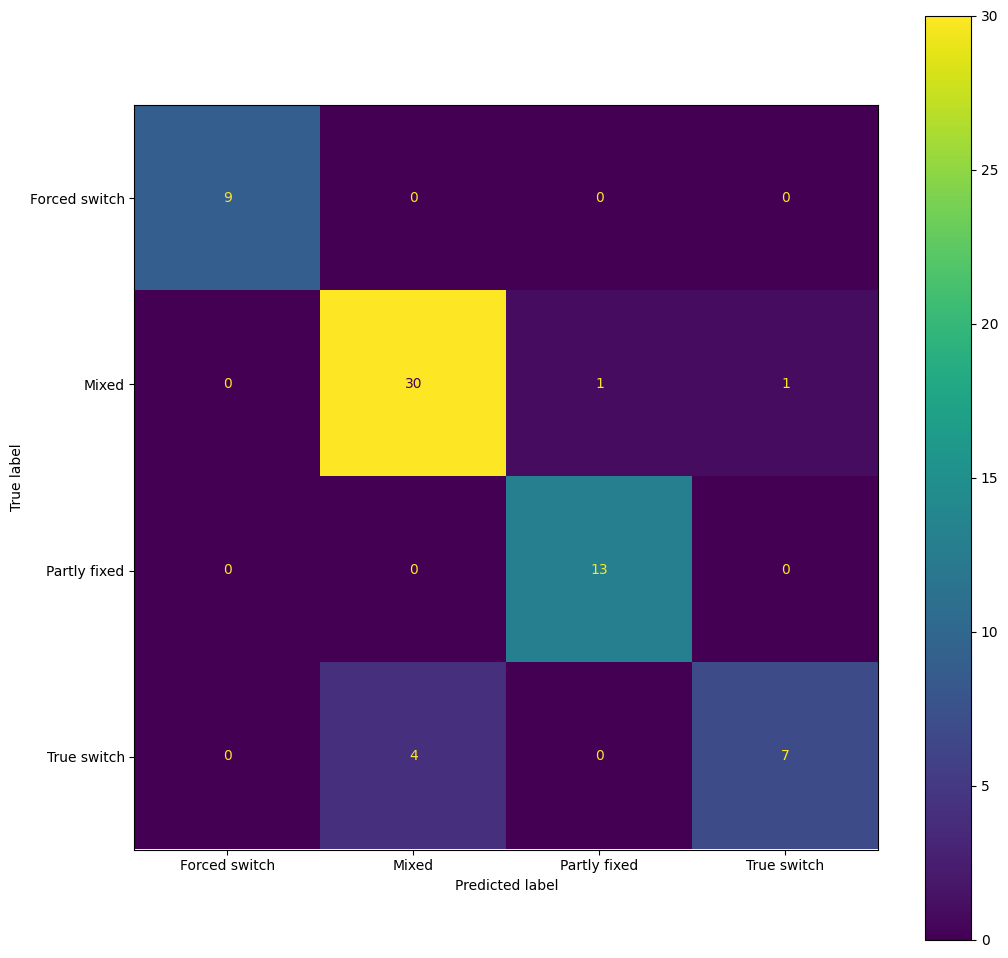

In [240]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(12, 12))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(ax=ax)

plt.show()

Тестовый датасет

In [216]:
df_test["X"] = df_test["Класс"] + ";" + df_test["Русская графика"] + ";" + df_test["Английская графика"] + ";" + df_test["threegrams"] + ";" + df_test["Словарь"]

In [217]:
df_test.head()

,Класс,Русская графика,Английская графика,Произношение,Степень интеграции,Контекст,Словарь,ngrams,threegrams,X
0,термин,эм би эй,MBA,русское обычное,NaN,с 2009 по 2011 год я получала MBA в гарвардско...,отсутствует,"с 2009,2009 по,по 2011,2011 год,год я,я получа...","с 2009 по,2009 по 2011,по 2011 год,2011 год я,...","термин;эм би эй;MBA;с 2009 по,2009 по 2011,по ..."
1,бренд,маккензи,McKinsey,смешанное,NaN,я работала в компании McKinsey была аналитиком...,отсутствует,"я работала,работала в,в компании,компании McKi...","я работала в,работала в компании,в компании Mc...","бренд;маккензи;McKinsey;я работала в,работала ..."
2,слово,милитари,military,русское обычное,NaN,вообще считается что гарвард - это школа трёх ...,Русский орфографический словарь,"вообще считается,считается что,что гарвард,гар...","вообще считается что,считается что гарвард,что...","слово;милитари;military;вообще считается что,с..."
3,слово,перформила,perform,русское обычное,NaN,ну как-то я хорошо перформила как очень умные ...,отсутствует,"ну как-то,как-то я,я хорошо,хорошо перформила,...","ну как-то я,как-то я хорошо,я хорошо перформил...","слово;перформила;perform;ну как-то я,как-то я ..."
4,термин,саббатикал,sabbatical,русское обычное,NaN,очень выгодно отправлять людей либо в декрет л...,отсутствует,"очень выгодно,выгодно отправлять,отправлять лю...","очень выгодно отправлять,выгодно отправлять лю...",термин;саббатикал;sabbatical;очень выгодно отп...


In [218]:
X_final = df_test["X"]

In [219]:
X_final_test_tfidf = vectorizer.transform(X_final)

In [241]:
predictions_final_test = stacking_model_2grams.predict(X_final_test_tfidf)

In [242]:
encoding_dict = {i: value for i, value in enumerate(le.classes_)}
print(encoding_dict)

{0: 'Forced switch', 1: 'Mixed', 2: 'Partly fixed', 3: 'True switch'}


In [243]:
results = pd.DataFrame({'Русская графика': df_test["Русская графика"], 'Английская графика': df_test["Английская графика"], 'Степень интеграции': predictions_final_test, 'Контекст': df_test["Контекст"]})
results['Степень интеграции'] = results['Степень интеграции'].replace({
    0: 'Forced switch',
    1: 'Mixed',
    2: 'Partly fixed',
    3: 'True switch'
})

In [244]:
results

,Русская графика,Английская графика,Степень интеграции,Контекст
0,эм би эй,MBA,Forced switch,с 2009 по 2011 год я получала MBA в гарвардско...
1,маккензи,McKinsey,Forced switch,я работала в компании McKinsey была аналитиком...
2,милитари,military,Partly fixed,вообще считается что гарвард - это школа трёх ...
3,перформила,perform,Mixed,ну как-то я хорошо перформила как очень умные ...
4,саббатикал,sabbatical,Mixed,очень выгодно отправлять людей либо в декрет л...
5,джимат,GMAT,Forced switch,нужно сделать три вещи первое - это сдать GMAT...
6,ит депендз,it depends,True switch,второе что единственный ответ в бизнесе звучит...
7,кейс-метод,case-method,Partly fixed,мы учимся через кейс-метод это единственный сп...
8,пивотнуться,pivot,Mixed,им нужно закрыть бизнес и пивотнуться pivot эт...
9,энгри бэнкерз,angry bankers,True switch,там было много таких этих банкиров богатых кот...
